In [23]:
import iracema
import matplotlib.pyplot as plt

audio = iracema.Audio("janela_cut.wav")

# audio.play()
# audio.plot()

# specifying window and hop sizes
window, hop = 2048, 1024

# calculating the FFT
fft = iracema.spectral.fft(audio, window, hop)

# plotting the spectrogram
# iracema.plot.plot_spectrogram(fft)

# calculating the RMS
rms = iracema.features.rms(audio, window, hop)

# plotting the RMS
# rms.plot()

# calculating the Peak Envelope
peak = iracema.features.peak_envelope(audio, window, hop)

# plotting the Peak Envelope
# peak.plot()


# extract pitch
hps_pitch = iracema.pitch.hps(fft, minf0=1, maxf0=1000)

#extract harmonics
harmonics = iracema.harmonics.extract(fft, hps_pitch)

print(harmonics)

{'frequency': TimeSeries: (nfeatures=16, nsamples=968), fs=43.06640625, unit=, label=, 'magnitude': TimeSeries: (nfeatures=16, nsamples=968), fs=43.06640625, unit=, label=, 'phase': TimeSeries: (nfeatures=16, nsamples=968), fs=43.06640625, unit=, label=}


In [1]:
# plot the harmonics over the spectrogram
#iracema.plot.plot_audio_spectrogram_harmonics(
#	audio=audio,
#	rms=rms,
##	peak_envelope=peak,
#	fft=fft,
#	fzero=harmonics['frequency'],
#	harmonics=harmonics['frequency'],#
#	fftlim=(0,12000)
#	)

(16, 968) (968,)
(968,)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


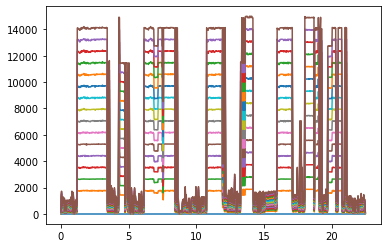

In [70]:
# print(harmonics['frequency'].time)
x = harmonics['frequency'].data
y = harmonics['frequency'].time
print(x.shape, y.shape)
print(x[1].shape)
for n, data in enumerate(x):
    print(n)
    plt.plot(y, x[n])

In [47]:
mytime = y.shape[0] / 44.1

In [48]:
print(mytime)

21.950113378684808


In [91]:

freq_list = []
for n, data in enumerate(x):
    if n != 0:
        freq_sub_list = []
        samples = data.shape[0]
        half_second = int(0.5 * 44.1)
        mymod = int(samples/half_second)
        for i, d in enumerate(data):
            if i % mymod == 0:
                freq_sub_list.append(d)
        freq_list.append(freq_sub_list)

print(freq_list)


[[21.533203125, 21.533203125, 1754.9560546875, 1776.4892578125, 21.533203125, 107.666015625, 1744.189453125, 1577.30712890625, 1765.72265625, 107.666015625, 161.4990234375, 1765.72265625, 172.265625, 1442.724609375, 129.19921875, 215.33203125, 1776.4892578125, 172.265625, 1868.00537109375, 183.0322265625, 183.0322265625, 75.3662109375], [32.2998046875, 32.2998046875, 2637.8173828125, 2664.73388671875, 32.2998046875, 161.4990234375, 2653.96728515625, 2390.185546875, 2648.583984375, 161.4990234375, 242.24853515625, 2648.583984375, 258.3984375, 2147.93701171875, 193.798828125, 322.998046875, 2648.583984375, 258.3984375, 2793.93310546875, 274.54833984375, 274.54833984375, 113.04931640625], [43.06640625, 43.06640625, 3477.6123046875, 3563.7451171875, 43.06640625, 215.33203125, 3515.29541015625, 3192.29736328125, 3552.978515625, 215.33203125, 322.998046875, 3552.978515625, 344.53125, 2885.44921875, 258.3984375, 430.6640625, 3499.1455078125, 344.53125, 3725.244140625, 366.064453125, 366.06445

In [95]:
import numpy as np
freq_list = np.array(freq_list)

[[   21.53320312    21.53320312  1754.95605469  1776.48925781
     21.53320312   107.66601562  1744.18945312  1577.30712891
   1765.72265625   107.66601562   161.49902344  1765.72265625
    172.265625    1442.72460938   129.19921875   215.33203125
   1776.48925781   172.265625    1868.00537109   183.03222656
    183.03222656    75.36621094]
 [   32.29980469    32.29980469  2637.81738281  2664.73388672
     32.29980469   161.49902344  2653.96728516  2390.18554688
   2648.58398438   161.49902344   242.24853516  2648.58398438
    258.3984375   2147.93701172   193.79882812   322.99804688
   2648.58398438   258.3984375   2793.93310547   274.54833984
    274.54833984   113.04931641]
 [   43.06640625    43.06640625  3477.61230469  3563.74511719
     43.06640625   215.33203125  3515.29541016  3192.29736328
   3552.97851562   215.33203125   322.99804688  3552.97851562
    344.53125     2885.44921875   258.3984375    430.6640625
   3499.14550781   344.53125     3725.24414062   366.06445312
    3